In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base directory and txpid values
base_dir = "~/RS/thinker/data/detect_log"
base_dir = os.path.expanduser(base_dir)
dxpids = {
    "drc-0.25rand": ("v18_drc_025rand_2", "a_", ""),
    "thinker-0.25rand": ("v18_thinker_025rand", "a_", ""),
    #"drc-0.05rand": ("v18_drc_005rand", "a_", ""),
    #"thinker-0.05rand": ("v18_thinker_005rand_2", "a_", ""),
    "drc-adv": ("v18_drc_2_confuse", "a_", ""),
    "thinker-adv": ("v18_thinker_confuse", "a_", ""),
    "drc": ("v18_drc_2_base", "a_", ""),
    "drc (no model)": ("v18_drc_2_base", "a_", "_hs"),
        }

txpids = ["1k", "2k", "5k", "10k", "20k",]# "50k"]
data_sizes = [1000, 2000, 5000, 10000, 20000,]# 50000]


# Initialize data structures to hold the accuracy and F1 scores
acc_data = {dxpid: [] for dxpid in dxpids}
f1_data = {dxpid: [] for dxpid in dxpids}

# Load the data
for dxpid, file_names in dxpids.items():
    acc_data[dxpid] = {d: [] for d in data_sizes}
    f1_data[dxpid] = {d: [] for d in data_sizes}
    for txpid, data_size in zip(txpids, data_sizes):
        n = 0
        while(True):
            base_path = os.path.join(base_dir, file_names[0]+"-%d"%n, "net")
            if not os.path.exists(base_path):
                base_path = os.path.join(base_dir, file_names[0]+"-%d"%n)
            if not os.path.exists(base_path):
                break
            stats_path = os.path.join(base_path, file_names[1]+txpid+file_names[2], "stats.npy")
            # Check if the file exists to avoid errors
            if os.path.exists(stats_path):
                stats = np.load(stats_path, allow_pickle=True)
                last_record = stats[-1]  # Get the last item in the list
                # Extract "test\acc" and "test\f1" and append to the respective lists
                acc_data[dxpid][data_size].append(last_record["test/acc"])
                f1_data[dxpid][data_size].append(last_record["test/f1"])
            else:
                print(f"File not found: {stats_path}")
                acc_data[dxpid][data_size].append(None)
                f1_data[dxpid][data_size].append(None)
                break
            n += 1

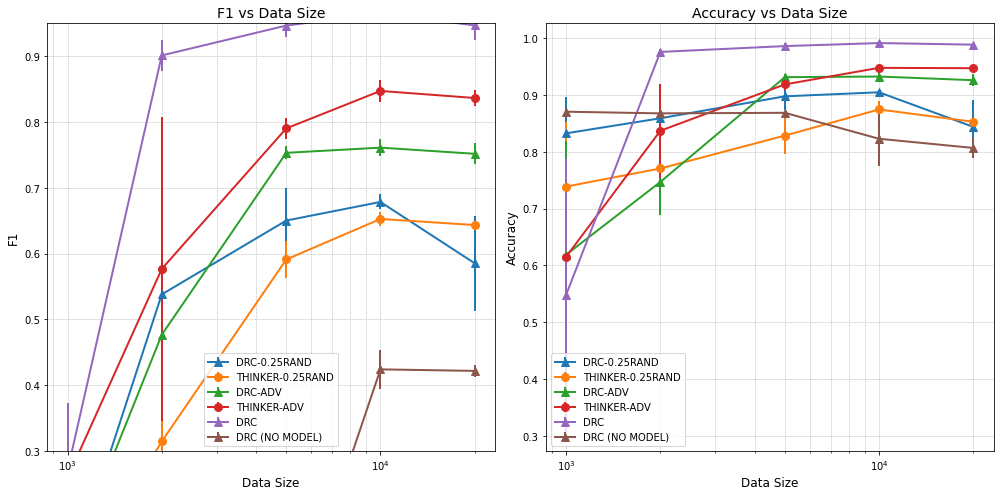

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

# F1 Score Plot with Error Bars
plt.subplot(1, 2, 1)
for dxpid in dxpids:
    means = []
    errors = []
    for d in data_sizes:
        f1_values = f1_data[dxpid][d]
        mean = np.mean(f1_values)
        std_dev = np.std(f1_values)
        means.append(mean)
        errors.append(std_dev)

    if "thinker" in dxpid:
        marker = 'o'
    elif "mcts" in dxpid:
        marker = 's'
    elif "drc" in dxpid:
        marker = '^'
    else:
        marker = 'D'

    plt.errorbar(data_sizes, means, yerr=errors, label=f'{dxpid.upper()}', marker=marker, linestyle="-", linewidth=2, markersize=8)
plt.title('F1 vs Data Size', fontsize=14)
plt.xlabel('Data Size', fontsize=12)
plt.ylabel('F1', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xscale('log')
plt.ylim([0.3, 0.95])

# F1 Score Plot with Error Bars
plt.subplot(1, 2, 2)
for dxpid in dxpids:
    means = []
    errors = []
    for d in data_sizes:
        accs = acc_data[dxpid][d]
        mean = np.mean(accs)
        std_dev = np.std(accs)
        means.append(mean)
        errors.append(std_dev)

    if "thinker" in dxpid:
        marker = 'o'
    elif "mcts" in dxpid:
        marker = 's'
    elif "drc" in dxpid:
        marker = '^'
    else:
        marker = 'D'

    plt.errorbar(data_sizes, means, yerr=errors, label=f'{dxpid.upper()}', marker=marker, linestyle="-", linewidth=2, markersize=8)
plt.title('Accuracy vs Data Size', fontsize=14)
plt.xlabel('Data Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xscale('log')